In [1]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [2]:

import gc
def loadXST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
        try:
         D=np.array(f[s]['values'])
         D2.append(D[:,sis][sis])
        except:
            continue;
    D2=np.array(D2)
    return D2


In [3]:
dhours=[]
dcnt=[]
opath='xst2_mean'
fpath='xst2'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    for fn in files:
        ext=fn.split('.')[-1]
#    if ext!='h5': continue;
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        fhour=ftime[:-3]
#        print(band,ftime,fhour)
        if fhour in dhours: 
            dcnt[dhours.index(fhour)]+=1;
        else:
            dhours.append(fhour)
            dcnt.append(1)
print(dhours,dcnt)

8192
['2022-06-27-17', '2022-06-27-18', '2022-06-27-19', '2022-06-27-20', '2022-06-27-21', '2022-06-27-22', '2022-06-27-23', '2022-06-28-00', '2022-06-28-01', '2022-06-28-02', '2022-06-28-03', '2022-06-28-04', '2022-06-28-05', '2022-06-28-06', '2022-06-28-07'] [512, 1024, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512]


In [5]:
sis=[i for i in range(18)]
nsi=len(sis)

for shour in dhours:
    day=int(shour[8:8+2])
    hour=int(shour[11:11+2])
#    if day<24: continue;
#    if hour<9: continue;
    print(shour,day,hour)
#    continue;
    xst=np.zeros([512,nsi,nsi],dtype='complex')
    cnt=np.zeros([512],dtype='int')
    for fn in files:
        ext=fn.split('.')[-1]
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        fhour=ftime[:-3]
        if fhour!=shour: continue;
        D=loadXST(fpath+"/"+fn,sis);
        cnt[band]+=D.shape[0];
        xst[band]+=D.sum(axis=0);
    xst/=cnt[:,np.newaxis,np.newaxis];
    np.savez(opath+"/xst_mean_"+shour,xst=xst,cnt=cnt)


2022-06-27-17 27 17
2022-06-27-18 27 18
2022-06-27-19 27 19
2022-06-27-20 27 20
2022-06-27-21 27 21
2022-06-27-22 27 22
2022-06-27-23 27 23
2022-06-28-00 28 0
2022-06-28-01 28 1
2022-06-28-02 28 2
2022-06-28-03 28 3
2022-06-28-04 28 4
2022-06-28-05 28 5
2022-06-28-06 28 6
2022-06-28-07 28 7


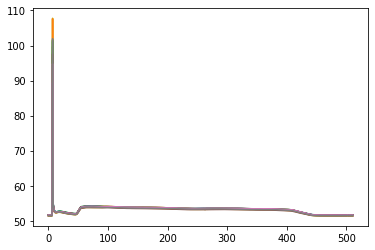

In [10]:
for si in sis:
    plt.plot(10*np.log10(np.abs(xst[:,si,si])))

In [ ]:
def LoadFiles(fpath):
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    return
    Data=[]
    Bands=[]
    for f in files:
        ext=f.split('.')[-1]
        if ext!='h5': continue;
        s=f.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        try:
         D=loadXST(join(fpath,f));
         D=np.array(D)
         print("band=",band," time=",ftime," Data size=",D.shape)
         Bands.append(band)
         Data.append(D)
        except:
         print('Can not open',f)
        gc.collect()
    return Bands,Data
